# Objective:

   In this project Neural Network based models are buit to recognize the digits in the images captured by Google Street view. 

### Step 1: Importing necessary Libraries

In [ ]:
import h5py # Hierarchical Data Format version 5 
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd # For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data.
import math #To perform mathematical operations like exponential, power operations etc,..
import tensorflow as tf #To build Neural Network Models.
import keras #To build Neural Network Models.
from keras.models import Sequential #This kind of Model is used because our layers have exactly one input and output tensor
from keras.layers import Dense #To add layers in the Sequential Model.

#To add activation layers:
from keras.layers import Activation, LeakyReLU 
#To add Reglarization Layers:
from keras.layers import BatchNormalization, Dropout

from keras.layers import Flatten  # To Reshape the input

#To do Optimization to updaate the parameters(Weight and bias):
from keras.optimizers import SGD, RMSprop
from keras.optimizers import Adam

from keras.utils.np_utils import to_categorical #To Perform One-Hot Encoding on the dependent variable to support Cross-Entropy cost function.
from keras.regularizers import l2 #To perform Ridge Regularization

#To perform Hyperparameter tuning:#### a. Reading the Data and structure of the file:#### a. Reading the Data and structure of the file:### Step 1: Importing necessary Libraries
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings(action =  "ignore")



Using TensorFlow backend.


### Step 2:. Reading the Data and structure of the file:

In [ ]:
data = h5py.File('/content/gdrive/My Drive/AIML/Sri Rama Jayam/Intro to NN and DL/SVHN_single_grey1.h5') #Reading the data file from Google Drive.

In [ ]:
[key for key in data.keys()] # Understanding the contents that file have.

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
#Extracting the Train, Validation and Testing dataSet from the file:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_val = data['X_val'][:]
y_val = data['y_val'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]


#### Inference on the above steps:
1. The data files were read form the google drive.
2. The contents in the files were understood and extracted.
3. The extracted training, validation and testing will be used for creating model, improving and fianlizing the model and testing the model in the production respectively.

### Step 3: Visualizing the data:

label for the images are : [2 6 7 4 4 0 3 0 7 3]


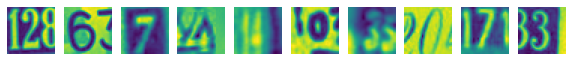

In [ ]:
plt.figure(figsize=(10, 5)) #Determining the output figure size.

#Plotting the image:
for x in range(10):
  plt.subplot(1,10, x+1)
  plt.imshow(X_train[x])
  plt.axis('off')
print( 'label for the images are : {}'. format(y_train[0:10]))  

label for the images are : [1 7 2 9 0 9 1 8 4 4]


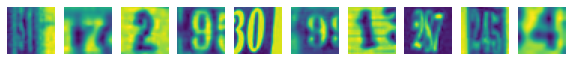

In [ ]:
plt.figure(figsize=(10, 5)) #Determining the output figure size.

#Plotting the image:
for x in range(10):
  plt.subplot(1,10, x+1)
  plt.imshow(X_test[x])
  plt.axis('off')
print( 'label for the images are : {}'. format(y_test[0:10]))

label for the images are : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


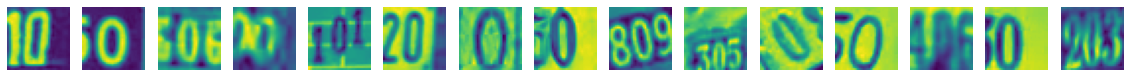

In [ ]:
plt.figure(figsize=(10, 5)) #Determining the output figure size.

#Plotting the image:
for x in range(15):
  plt.subplot(1,15, x+1)
  plt.imshow(X_val[x])
  plt.axis('off')
print( 'label for the images are : {}'. format(y_val[0:15]))

#### Inference on the above steps:
1. In the above cells the data of training, visualization and teting data are visualized.
2. The images seem to be a real time images of House numbers taken by Google Street view.
3. The images are not only with single digit there are also more than single digit in a image. But, the number of the image is the digit that is present in the middle of the image.

### Step 4: Visualizing the distribution of Label data:

(array([4186., 4172., 4197., 4281., 4188., 4232., 4168., 4192., 4188.,
        4196.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

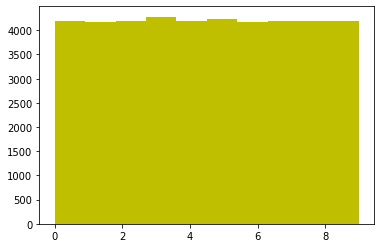

In [ ]:
plt.hist(y_train, bins=10, color='y') #Plotting a histogram.

#### Inference on the above steps:
1. The above plot shows that the distribution of the labels in the y_train.
2. The distibution is almost uniform.

(array([1814., 1828., 1803., 1719., 1812., 1768., 1832., 1808., 1812.,
        1804.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

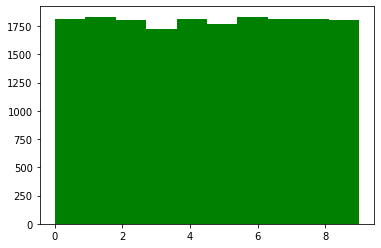

In [ ]:
plt.hist(y_test, bins=10, color='g') #Plotting a histogram.

#### Inference on the above steps:
1. The above plot shows that the distribution of the labels in the y_test.
2. The distibution is almost uniform but still there are some variation.

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

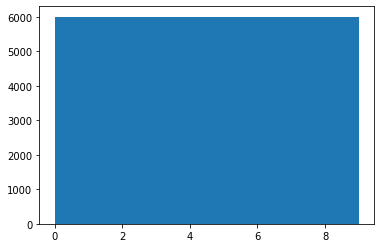

In [ ]:
plt.hist(y_val, bins=10) #Plotting a histogram.

#### Inference on the above steps:
1. The above plot shows that the distribution of the labels in the y_test.
2. The distibution is very uniform.

### Step 5: Understanding the shape of the data:

In [ ]:
print('Training Data Shape and Data Type :')
print(" X --->  Shape :", X_train.shape,"and  Data Type : ", X_train.dtype) #Extracting the shape and datatype of images.
print(" y --->  Shape :", y_train.shape,"       and  Data Type : ", y_train.dtype) #Extracting the shape of the Labels.
print('\n')
print('Testing Data Shape and Data Type :')
print(" X --->  Shape :", X_test.shape,"and  Data Type : ", X_test.dtype) #Extracting the shape and datatype of images.
print(" y --->  Shape :", y_test.shape,"       and  Data Type : ", y_test.dtype) #Extracting the shape of the Labels.
print('\n')
print('Validation Data Shape and Data Type :')
print(" X --->  Shape :", X_val.shape,"and  Data Type : ", X_val.dtype) #Extracting the shape and datatype of images.
print(" y --->  Shape :", y_val.shape,"       and  Data Type : ", y_val.dtype) #Extracting the shape of the Labels.

Training Data Shape and Data Type :
 X --->  Shape : (42000, 32, 32) and  Data Type :  float32
 y --->  Shape : (42000,)        and  Data Type :  uint8


Testing Data Shape and Data Type :
 X --->  Shape : (18000, 32, 32) and  Data Type :  float32
 y --->  Shape : (18000,)        and  Data Type :  uint8


Validation Data Shape and Data Type :
 X --->  Shape : (60000, 32, 32) and  Data Type :  float32
 y --->  Shape : (60000,)        and  Data Type :  uint8


#### Inference on the above steps:
1. The above output shows the shape and datatype of the data available to us.
2. Training, testing and validation data contains 42000, 18000 and 60000 images respectively.
3. All the above dataset consisits images of size 32 x 32 (height x width).
4. Data type of Labels (y) is in the form of unsigned integer of 8 bits (i.e) contains whole numbers from 0 to 255.
5. Data type of images (X) is in the form of Float.

### Step 6: Reshaping the data:

In [ ]:
#Extracting the Reshape of the data:
X_train = X_train.reshape(42000,1024)
X_test = X_test.reshape(18000,1024)
X_val = X_val.reshape(60000,1024)

In [ ]:
#Checking the shape of the image and label:
print('Training Data Reshaped Shape:')
print(" X Shape :", X_train.shape)
print(" y Shape :", y_train.shape)
print('\n')
print('Testing Data Reshaped Shape:')
print(" X Shape :", X_test.shape)
print(" y Shape :", y_test.shape)
print('\n')
print('Validation Reshaped Shape:')
print(" X Shape :", X_val.shape)
print(" y Shape :", y_val.shape)

Training Data Reshaped Shape:
 X Shape : (42000, 1024)
 y Shape : (42000,)


Testing Data Reshaped Shape:
 X Shape : (18000, 1024)
 y Shape : (18000,)


Validation Reshaped Shape:
 X Shape : (60000, 1024)
 y Shape : (60000,)


#### Inference on the above steps:
1. The images dataset is reshaped (i.e) Flattened the data, we do Flattening of the input image in order to club the rows and columns of the image to support the NN architecture. 

### Step 7: One - Hot Encoding:

In [ ]:
print(y_train[0:20]) # Printing the Labels before One-Hot Encoding.

# On-Hot Encoding:
y_train = tf.keras.utils.to_categorical(y_train, num_classes= 10)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes= 10)
y_val   = tf.keras.utils.to_categorical(y_val, num_classes= 10)
print('\n')
print(y_train[0:20]) # Printing the Labels after One-Hot Encoding.

[2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### Inference on the above steps:
1. In the above output we can see two outputs one is Label before one-hot encodeing and another Label is after one-hot encoding.
2. The first output shows Labels before One-Hot Encoding (only numbers) which is not suitable for performing Cross-entropy.
3. The second output shows the One-Hot encoded Output which is suitable for performing Cross -entropy to estimate the cost function.

### Step 8: Normalizing the images:
     We have to do Normalization in order to make the pixel values uniform as the pixel values in the original image are different for each image. 

In [33]:
print('Training Data maximum and minimum pixel values :')
print(' Maximum Pixel Value:',X_train.max()) # Fetching the maximum pixel value in X_train
print(' Minimum Pixel Value:',X_train.min()) # Fetching the minimum pixel value in X_train
print('\n')
print('Testing Data maximum and minimum pixel values :')
print(' Maximum Pixel Value:',X_test.max()) # Fetching the maximum pixel value in X_test
print(' Minimum Pixel Value:',X_test.min()) # Fetching the minimum pixel value in X_test
print('\n')
print('Vallidation Data maximum and minimum pixel values :')
print(' Maximum Pixel Value:',X_val.max()) # Fetching the maximum pixel value in X_val
print(' Minimum Pixel Value:',X_val.min())  # Fetching the minimum pixel value in X_val

Training Data maximum and minimum pixel values :
 Maximum Pixel Value: 254.9745
 Minimum Pixel Value: 0.0


Testing Data maximum and minimum pixel values :
 Maximum Pixel Value: 254.9745
 Minimum Pixel Value: 0.0


Vallidation Data maximum and minimum pixel values :
 Maximum Pixel Value: 254.9745
 Minimum Pixel Value: 0.0


In [34]:
X_train = X_train /  254.9745 #Dividing by the maximum value seen in the above output.
X_test = X_test /  254.9745 #Dividing by the maximum value seen in the above output.
X_val = X_val /  254.9745 #Dividing by the maximum value seen in the above output.

print('Training Data Normalized maximum and minimum pixel values :')
print(' Maximum Normalized Pixel Value:',X_train.max())
print(' Minimum Normalized Pixel Value:',X_train.min())
print('\n')
print('Testing Data Normalized maximum and minimum pixel values :')
print(' Maximum Normalized Pixel Value:',X_test.max())
print(' Minimum Normalized Pixel Value:',X_test.min())
print('\n')
print('Validation Data Normalized maximum and minimum pixel values :')
print(' Maximum Normalized Pixel Value:',X_val.max())
print(' Minimum Normalized Pixel Value:',X_val.min())

Training Data Normalized maximum and minimum pixel values :
 Maximum Normalized Pixel Value: 1.0
 Minimum Normalized Pixel Value: 0.0


Testing Data Normalized maximum and minimum pixel values :
 Maximum Normalized Pixel Value: 1.0
 Minimum Normalized Pixel Value: 0.0


Validation Data Normalized maximum and minimum pixel values :
 Maximum Normalized Pixel Value: 1.0
 Minimum Normalized Pixel Value: 0.0


##### Inference on the above steps:
  In the above cells the maximum and minimum value of the pixels in the each dataset was understood and Normalized whose values are also printed above.

==================================================================================================================

### Step 9: Model Building:

  Here we build a Neural Network model which is capable of classifying the Google's Street view House Numbers to the maximum accuracy. Here all the models are Sequential Model (ie) these models take single input and give single output in each Layer.

#### Model - 1 Building a basic model (Trial - 1)

 This model just consist only the Hidden and activation layers, the activation layer is a sigmoid function which makkes any input less than zero to value closer to zero and any input greater than one equal to any value closer to one. In all the models from here the final Layer consists of Softmax as its activation function to convert the output into probabilities. 

In [ ]:
model = Sequential()  #Creating a plain Keras Sequential model to stack the layers:

#Adding the Input Layer and activation Layer using Keras Dense Function with 1024 Hidden Neurons:
model.add(Dense(1024, input_shape = (1024, ), activation='sigmoid', name ='Layer_1'))

#Adding the Layer_2and activation Layer using Keras Dense Function with 512 Hidden Neurons:
model.add(Dense(512, activation='sigmoid', name ='Layer_2'))

#Adding the Layer_3and activation Layer using Keras Dense Function with 128 Hidden Neurons:
model.add(Dense(128, activation='sigmoid', name ='Layer_3'))

#Adding the Layer_4and activation Layer using Keras Dense Function with 64 Hidden Neurons:
model.add(Dense(64, activation='sigmoid', name ='Layer_4'))

#Adding the Layer_5 and activation Layer using Keras Dense Function with 32 Hidden Neurons:
model.add(Dense(32, activation='sigmoid', name ='Layer_5'))

#Adding the Layer_6 and activation Layer using Keras Dense Function with 32 Hidden Neurons:
model.add(Dense(32, activation='sigmoid', name ='Layer_6'))

#Adding the Output Layer and Softmax as the activation Layer to convert the outputs into probabilities:
model.add(Dense(10, activation='softmax', name ='Output_Layer'))

In [ ]:
#Performing the Stochastic Gradient Descent Optimization to do optimization and update the parameters. 
learning_rate = 0.00001
epochs = 100
sgd = SGD(lr = learning_rate, decay = learning_rate/epochs, momentum = 0.8, nesterov=True )

In [ ]:
# config the model with losses and metrics:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the model with training datasets:
history = model.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 2s 53us/step - loss: 2.4241 - accuracy: 0.0992
Epoch 2/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4236 - accuracy: 0.0992
Epoch 3/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4231 - accuracy: 0.0992
Epoch 4/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4226 - accuracy: 0.0992
Epoch 5/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4222 - accuracy: 0.0992
Epoch 6/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.4217 - accuracy: 0.0992
Epoch 7/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4212 - accuracy: 0.0992
Epoch 8/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.4208 - accuracy: 0.0992
Epoch 9/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.4203 - accuracy: 0.0992
Epoch 10/100
42000/42000 [====================

In [ ]:
# Testing the prerformance of the model on Validation Dataset:
evaluation_val = model.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val[1])

60000/60000 [==============================] - 5s 91us/step
Validation accuracy:  0.10000000149011612


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured m0del was also trained whose accuracy on training data is around 9.92% ~ 10%
4. The accuracy is very low upon evaluating the same model on Validation Data the performance improves it comes exactly 10%.

    Let try improving the model by using different activations in the forthcoming trials. The activations with wich the models were tested are ReLU, elu, selu and LeakyReLU in the following trial 2, 3, 4 and  5 

#### Model - 1 Building a basic model (Trial - 2):

In [ ]:
model_1 = Sequential()

model_1.add(Dense(1024, input_shape = (1024, ), activation='relu', name ='Layer_1'))

model_1.add(Dense(512, activation='relu', name ='Layer_2'))

model_1.add(Dense(128, activation='relu', name ='Layer_3'))

model_1.add(Dense(64, activation='relu', name ='Layer_4'))

model_1.add(Dense(32, activation='relu', name ='Layer_5'))

model_1.add(Dense(32, activation='relu', name ='Layer_6'))

model_1.add(Dense(10, activation='softmax', name ='Output_Layer'))



In [ ]:
model_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_1 = model_1.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3052 - accuracy: 0.1018
Epoch 2/100
42000/42000 [==============================] - 1s 14us/step - loss: 2.3051 - accuracy: 0.1020
Epoch 3/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3051 - accuracy: 0.1021
Epoch 4/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3050 - accuracy: 0.1022
Epoch 5/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3050 - accuracy: 0.1024
Epoch 6/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3049 - accuracy: 0.1025
Epoch 7/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3048 - accuracy: 0.1024
Epoch 8/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3048 - accuracy: 0.1025
Epoch 9/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3047 - accuracy: 0.1027
Epoch 10/100
42000/42000 [====================

In [ ]:
evaluation_val_1 = model_1.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_1[1])

60000/60000 [==============================] - 6s 95us/step
Validation accuracy:  0.09736666828393936


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured model was also trained whose accuracy on training data is around 9.85% ~ 10%
4. The accuracy is very low upon evaluating the same model on Validation Data the performance improves it comes around 9.73% ~ 10%.

#### Model - 1 Building a basic model (Trial - 3)

In [ ]:
model_2 = Sequential()

model_2.add(Dense(1024, input_shape = (1024, ), activation='elu', name ='Layer_1'))

model_2.add(Dense(512, activation='elu', name ='Layer_2'))

model_2.add(Dense(128, activation='elu', name ='Layer_3'))

model_2.add(Dense(64, activation='elu', name ='Layer_4'))

model_2.add(Dense(32, activation='elu', name ='Layer_5'))

model_2.add(Dense(32, activation='elu', name ='Layer_6'))

model_2.add(Dense(10, activation='softmax', name ='Output_Layer'))



In [ ]:
model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_2 = model_2.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 16us/step - loss: 2.3643 - accuracy: 0.1042
Epoch 2/100
42000/42000 [==============================] - 1s 14us/step - loss: 2.3557 - accuracy: 0.1022
Epoch 3/100
42000/42000 [==============================] - 1s 14us/step - loss: 2.3493 - accuracy: 0.1013
Epoch 4/100
42000/42000 [==============================] - 1s 14us/step - loss: 2.3442 - accuracy: 0.0995
Epoch 5/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3401 - accuracy: 0.0991
Epoch 6/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3367 - accuracy: 0.0988
Epoch 7/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3339 - accuracy: 0.0992
Epoch 8/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3314 - accuracy: 0.0998
Epoch 9/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3293 - accuracy: 0.1005
Epoch 10/100
42000/42000 [====================

In [ ]:
evaluation_val_2 = model_2.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_2[1])

60000/60000 [==============================] - 6s 94us/step
Validation accuracy:  0.10991666465997696


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured m0del was also trained whose accuracy on training data is around 11%
4. The accuracy upon evaluating the same model on Validation Data the performance comes around only 11%.
5. There is some improvement in this model copared to previous models

#### Model - 1 Building a basic model (Trial - 4):

In [ ]:
model_3 = Sequential()

model_3.add(Dense(1024, input_shape = (1024, ), activation='selu', name ='Layer_1'))

model_3.add(Dense(512, activation='selu', name ='Layer_2'))

model_3.add(Dense(128, activation='selu', name ='Layer_3'))

model_3.add(Dense(64, activation='selu', name ='Layer_4'))

model_3.add(Dense(32, activation='selu', name ='Layer_5'))

model_3.add(Dense(32, activation='selu', name ='Layer_6'))

model_3.add(Dense(10, activation='softmax', name ='Output_Layer'))



In [ ]:
model_3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_3 = model_3.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 21us/step - loss: 2.4808 - accuracy: 0.1041
Epoch 2/100
42000/42000 [==============================] - 1s 16us/step - loss: 2.4090 - accuracy: 0.1091
Epoch 3/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3993 - accuracy: 0.1084
Epoch 4/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3939 - accuracy: 0.1087
Epoch 5/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3894 - accuracy: 0.1093
Epoch 6/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3854 - accuracy: 0.1095
Epoch 7/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3817 - accuracy: 0.1082
Epoch 8/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3782 - accuracy: 0.1080
Epoch 9/100
42000/42000 [==============================] - 1s 15us/step - loss: 2.3750 - accuracy: 0.1080
Epoch 10/100
42000/42000 [====================

In [ ]:
evaluation_val_3 = model_3.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_3[1])

60000/60000 [==============================] - 6s 101us/step
Validation accuracy:  0.13593333959579468


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured m0del was also trained whose accuracy on training data is around 13%
4. The accuracy upon evaluating the same model on Validation Data the performance improves it comes around 14%.
5. This model performance is better than the performance of the previous models.

#### Model - 1 Building a basic model (Trial - 5):

In [ ]:
model_5 = Sequential()

model_5.add(Dense(1024, input_shape = (1024, ), name ='Layer_1'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(512, name ='Layer_2'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(128, name ='Layer_3'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(64, name ='Layer_4'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(32, name ='Layer_5'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(32, name ='Layer_6'))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(Dense(10, activation='softmax', name ='Output_Layer'))



In [ ]:
model_5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_5 = model_5.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

Epoch 1/100
42000/42000 [==============================] - 1s 17us/step - loss: 2.3087 - accuracy: 0.1018
Epoch 2/100
42000/42000 [==============================] - 1s 14us/step - loss: 2.3086 - accuracy: 0.1018
Epoch 3/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3084 - accuracy: 0.1020
Epoch 4/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3083 - accuracy: 0.1019
Epoch 5/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3082 - accuracy: 0.1019
Epoch 6/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3081 - accuracy: 0.1019
Epoch 7/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3079 - accuracy: 0.1019
Epoch 8/100
42000/42000 [==============================] - 1s 12us/step - loss: 2.3078 - accuracy: 0.1020
Epoch 9/100
42000/42000 [==============================] - 1s 13us/step - loss: 2.3077 - accuracy: 0.1020
Epoch 10/100
42000/42000 [====================

In [ ]:
evaluation_val_5 = model_5.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_5[1])

60000/60000 [==============================] - 5s 90us/step
Validation accuracy:  0.10204999893903732


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured m0del was also trained whose accuracy on training data is around 9.92% ~ 10%
4. The accuracy upon evaluating the same model on Validation Data the performance improves it comes exactly 10%.
5. Therefore, we can use this model and do some improvemnts on this and try to improve the model's performance.

    In the above all trials it can be found that when selu activation functioin was used the model performance improved. But still its performance also very very low for reality. Further, let us try improving that model's performace by initializing weights.

#### Model - 2 Constructing the model with Weight initalization:
    Here the Sequential model is built with Selu activations in the hidden layers and initlaizing the weights based on the 'He-Normal' initialization.

In [ ]:
model_wt = Sequential()

model_wt.add(Dense(1024, input_shape = (1024, ), activation='elu', kernel_initializer='he_normal', name ='Layer_1'))

model_wt.add(Dense(512, activation='selu', kernel_initializer='he_normal', name ='Layer_2'))

model_wt.add(Dense(128, activation='selu', kernel_initializer='he_normal', name ='Layer_3'))

model_wt.add(Dense(64, activation='selu', kernel_initializer='he_normal', name ='Layer_4'))

model_wt.add(Dense(32, activation='selu', kernel_initializer='he_normal', name ='Layer_5'))

model_wt.add(Dense(32, activation='selu', kernel_initializer='he_normal', name ='Layer_6'))

model_wt.add(Dense(10, activation='softmax', name ='Output_Layer'))



In [ ]:
model_wt.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_wt = model_wt.fit(X_train, y_train, batch_size = 1000, epochs = 500, verbose = 1)

Epoch 1/500
42000/42000 [==============================] - 1s 19us/step - loss: 2.9848 - accuracy: 0.0876
Epoch 2/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.7770 - accuracy: 0.0850
Epoch 3/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.7329 - accuracy: 0.0864
Epoch 4/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.6964 - accuracy: 0.0864
Epoch 5/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.6644 - accuracy: 0.0865
Epoch 6/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.6360 - accuracy: 0.0875
Epoch 7/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.6112 - accuracy: 0.0890
Epoch 8/500
42000/42000 [==============================] - 1s 14us/step - loss: 2.5899 - accuracy: 0.0897
Epoch 9/500
42000/42000 [==============================] - 1s 15us/step - loss: 2.5715 - accuracy: 0.0913
Epoch 10/500
42000/42000 [====================

In [ ]:
evaluation_val_wt = model_wt.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_wt[1])

60000/60000 [==============================] - 5s 90us/step
Validation accuracy:  0.156616672873497


##### Inference on the above steps:
1. In the above cells a Sequential model was created with six hidden layers consisting of above mentioned hidden Neurons.
2. The created model was configured with loss and metrices.
3. The configured m0del was also trained whose accuracy on training data is around 23%
4. The accuracy is very low upon evaluating the same model on Validation Data the performance improves it comes just 16%.
5. Therefore, we can use this model and do some improvemnts on this and try to improve the model's performance.

    Further trials are done by adding the BatchNormalization layer and initiating the 'He-normal' weight initialization to the  models.

#### Model - 3: Building Models with BatchNormalization:

##### Model - 3 :Batch Normalization (Trial - 1):
    Here a Sequential Neural Network model is built by adding the BatchNormalization Layer with scaling and shifting parameters turned on, this model is given a selu activation with 'He-normal' weight iniitialization.

In [ ]:
model_bn = Sequential()

model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bn.add(BatchNormalization(center=True, scale=True))
model_bn.add(Activation('selu'))

model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(10, name ='Output_Layer'))
model_bn.add(Activation('softmax'))

In [ ]:
model_bn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bn = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 30us/step - loss: 2.9761 - accuracy: 0.1044
Epoch 2/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.9445 - accuracy: 0.1045
Epoch 3/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.9148 - accuracy: 0.1049
Epoch 4/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8887 - accuracy: 0.1048
Epoch 5/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8642 - accuracy: 0.1052
Epoch 6/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.8422 - accuracy: 0.1060
Epoch 7/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8225 - accuracy: 0.1065
Epoch 8/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.8030 - accuracy: 0.1061
Epoch 9/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7868 - accuracy: 0.1065
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt[1])

60000/60000 [==============================] - 6s 98us/step
Validation accuracy:  0.18226666748523712


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bn_adam = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 32us/step - loss: 2.7266 - accuracy: 0.1179
Epoch 2/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.4433 - accuracy: 0.1487
Epoch 3/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.3083 - accuracy: 0.1844
Epoch 4/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.2185 - accuracy: 0.2171
Epoch 5/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.1429 - accuracy: 0.2494
Epoch 6/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.0756 - accuracy: 0.2758
Epoch 7/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.0119 - accuracy: 0.3035
Epoch 8/200
42000/42000 [==============================] - 1s 13us/step - loss: 1.9534 - accuracy: 0.3284
Epoch 9/200
42000/42000 [==============================] - 1s 13us/step - loss: 1.9015 - accuracy: 0.3541
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt_ad = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt_ad[1])

60000/60000 [==============================] - 6s 93us/step
Validation accuracy:  0.8321166634559631


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 18%.
2. The performance of the model when using Adam optimizer was high on training data but on validation data it was around 83% only this may be due to overfitting of the model during training so some regularization need to be done further

##### Model - 3 : (Trial - 2):
        Here a Sequential Neural Network model is built by adding the BatchNormalization Layer without scaling and shifting parameters turned on, this model is given a selu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bn = Sequential()

model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bn.add(BatchNormalization()) #Adding a Batch Normalization Layer.
model_bn.add(Activation('selu')) #Adding a Selu acrivation Layer.

model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('selu'))

model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('selu'))

model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('selu'))

model_bn.add(Dense(10, name ='Output_Layer'))
model_bn.add(Activation('softmax'))

In [ ]:
model_bn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bn = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 27us/step - loss: 2.9477 - accuracy: 0.0981
Epoch 2/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.9259 - accuracy: 0.0988
Epoch 3/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.9053 - accuracy: 0.0987
Epoch 4/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.8858 - accuracy: 0.0995
Epoch 5/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8679 - accuracy: 0.1003
Epoch 6/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8503 - accuracy: 0.1013
Epoch 7/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.8347 - accuracy: 0.1005
Epoch 8/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.8195 - accuracy: 0.1023
Epoch 9/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8055 - accuracy: 0.1027
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt[1])

60000/60000 [==============================] - 6s 97us/step
Validation accuracy:  0.16308332979679108


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bn_adam = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 35us/step - loss: 2.6605 - accuracy: 0.1035
Epoch 2/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.4106 - accuracy: 0.1315
Epoch 3/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.3064 - accuracy: 0.1639
Epoch 4/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.2280 - accuracy: 0.1983
Epoch 5/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.1587 - accuracy: 0.2320
Epoch 6/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.0925 - accuracy: 0.2662
Epoch 7/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.0249 - accuracy: 0.2975
Epoch 8/200
42000/42000 [==============================] - 1s 13us/step - loss: 1.9600 - accuracy: 0.3289
Epoch 9/200
42000/42000 [==============================] - 1s 13us/step - loss: 1.8982 - accuracy: 0.3602
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt_ad = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt_ad[1])

60000/60000 [==============================] - 5s 90us/step
Validation accuracy:  0.8375833630561829


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 16%.
2. The performance of the model when using Adam optimizer was high on training data but on validation data it was around 83.75% only this may be due to overfitting of the model during training so some regularization need to be done further

##### Model - 3 : (Trial - 3):
     Here a Sequential Neural Network model is built by adding the BatchNormalization Layer without scaling and shifting parameters turned on, this model is given a RELU activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bn = Sequential()

model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))

model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))

model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))

model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bn.add(BatchNormalization( ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(10, name ='Output_Layer'))
model_bn.add(Activation('softmax'))

In [ ]:
model_bn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bn = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 25us/step - loss: 2.6686 - accuracy: 0.1054
Epoch 2/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6642 - accuracy: 0.1049
Epoch 3/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6615 - accuracy: 0.1060
Epoch 4/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6588 - accuracy: 0.1062
Epoch 5/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6564 - accuracy: 0.1070
Epoch 6/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6542 - accuracy: 0.1067
Epoch 7/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6498 - accuracy: 0.1069
Epoch 8/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6482 - accuracy: 0.1058
Epoch 9/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.6461 - accuracy: 0.1069
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt[1])

60000/60000 [==============================] - 5s 86us/step
Validation accuracy:  0.15189999341964722


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bn_adam = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 29us/step - loss: 2.6643 - accuracy: 0.1046
Epoch 2/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.5659 - accuracy: 0.1160
Epoch 3/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.4851 - accuracy: 0.1305
Epoch 4/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.4156 - accuracy: 0.1435
Epoch 5/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.3512 - accuracy: 0.1607
Epoch 6/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.2932 - accuracy: 0.1754
Epoch 7/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.2399 - accuracy: 0.1904
Epoch 8/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.1909 - accuracy: 0.2084
Epoch 9/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.1466 - accuracy: 0.2233
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt_ad = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt_ad[1])

60000/60000 [==============================] - 5s 88us/step
Validation accuracy:  0.8808500170707703


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 15.21%.
2. The performance of the model when using Adam optimizer was high on training data but on validation data it was around 88.08% only this may be due to overfitting of the model during training so some regularization need to be done further

##### Model - 3 : (Trial - 4):
    Here a Sequential Neural Network model is built by adding the BatchNormalization Layer with scaling and shifting parameters turned on, this model is given a relu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bn = Sequential()

model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bn.add(BatchNormalization(center=True, scale=True))
model_bn.add(Activation('relu'))

model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(10, name ='Output_Layer'))
model_bn.add(Activation('softmax'))

In [ ]:
model_bn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bn = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 27us/step - loss: 2.5877 - accuracy: 0.1004
Epoch 2/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5868 - accuracy: 0.1002
Epoch 3/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5834 - accuracy: 0.1007
Epoch 4/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5813 - accuracy: 0.1014
Epoch 5/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5793 - accuracy: 0.1018
Epoch 6/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5781 - accuracy: 0.1010
Epoch 7/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5754 - accuracy: 0.1022
Epoch 8/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5735 - accuracy: 0.1015
Epoch 9/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.5729 - accuracy: 0.1013
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt[1])

60000/60000 [==============================] - 5s 86us/step
Validation accuracy:  0.14908333122730255


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bn_adam = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 31us/step - loss: 2.5374 - accuracy: 0.1065
Epoch 2/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.4210 - accuracy: 0.1355
Epoch 3/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.3345 - accuracy: 0.1601
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.2640 - accuracy: 0.1838
Epoch 5/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.2034 - accuracy: 0.2083
Epoch 6/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.1495 - accuracy: 0.2285
Epoch 7/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.1007 - accuracy: 0.2500
Epoch 8/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.0578 - accuracy: 0.2684
Epoch 9/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.0183 - accuracy: 0.2876
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bt_ad = model_bn.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bt_ad[1])

60000/60000 [==============================] - 6s 93us/step
Validation accuracy:  0.880466639995575


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 14.9%.
2. The performance of the model when using Adam optimizer was high on training data but on validation data it was around 88.04% only this may be due to overfitting of the model during training so some regularization need to be done further.

    Further, let us try improving the above four models by doing regularization - dropout. A 50% drop-out is performed on the hidden Layers during training the model.

#### Model - 4 :Batch Normalization and Dropout:

##### Model - 4: (Trial -1):
    Here a Sequential Neural Network model is built by adding the 50% Dropout, BatchNormalization Layer with scaling and shifting parameters turned on, this model is given a selu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bd = Sequential()

model_bd.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bd.add(BatchNormalization(center=True, scale=True))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(10, name ='Output_Layer'))
model_bd.add(Activation('softmax'))

In [ ]:
model_bd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bd = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 30us/step - loss: 3.3794 - accuracy: 0.1006
Epoch 2/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3802 - accuracy: 0.0977
Epoch 3/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3725 - accuracy: 0.0980
Epoch 4/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3739 - accuracy: 0.0999
Epoch 5/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3691 - accuracy: 0.1000
Epoch 6/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3817 - accuracy: 0.0985
Epoch 7/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3746 - accuracy: 0.1019
Epoch 8/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3640 - accuracy: 0.1014
Epoch 9/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3513 - accuracy: 0.1017
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd[1])

60000/60000 [==============================] - 6s 96us/step
Validation accuracy:  0.09764999896287918


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bd.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bd_adam = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 35us/step - loss: 3.4428 - accuracy: 0.1003
Epoch 2/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.4420 - accuracy: 0.0995
Epoch 3/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.4236 - accuracy: 0.1001
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.4183 - accuracy: 0.1002
Epoch 5/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3919 - accuracy: 0.1002
Epoch 6/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3958 - accuracy: 0.1006
Epoch 7/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3816 - accuracy: 0.1017
Epoch 8/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3812 - accuracy: 0.0985
Epoch 9/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3735 - accuracy: 0.1021
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd_ad = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd_ad[1])

60000/60000 [==============================] - 6s 95us/step
Validation accuracy:  0.2468000054359436


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 9.7%.
2. The performance of the model when using Adam optimizer was very low on training data but on validation data it was around 24.6% only.

##### Model - 4: (Trial -2):
    Here a Sequential Neural Network model is built by adding the 50% Dropout, BatchNormalization Layer without scaling and shifting parameters turned on, this model is given a selu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bd = Sequential()

model_bd.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bd.add(BatchNormalization( ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bd.add(BatchNormalization( ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bd.add(BatchNormalization( ))
model_bd.add(Activation('selu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(10, name ='Output_Layer'))
model_bd.add(Activation('softmax'))

In [ ]:
model_bd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bd = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 33us/step - loss: 3.3711 - accuracy: 0.0994
Epoch 2/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3679 - accuracy: 0.0999
Epoch 3/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3739 - accuracy: 0.1016
Epoch 4/200
42000/42000 [==============================] - 1s 13us/step - loss: 3.3806 - accuracy: 0.0996
Epoch 5/200
42000/42000 [==============================] - 1s 13us/step - loss: 3.3627 - accuracy: 0.1020
Epoch 6/200
42000/42000 [==============================] - 1s 13us/step - loss: 3.3797 - accuracy: 0.1009
Epoch 7/200
42000/42000 [==============================] - 1s 13us/step - loss: 3.3907 - accuracy: 0.0973
Epoch 8/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3729 - accuracy: 0.0984
Epoch 9/200
42000/42000 [==============================] - 1s 12us/step - loss: 3.3588 - accuracy: 0.1028
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd[1])

60000/60000 [==============================] - 6s 98us/step
Validation accuracy:  0.1099499985575676


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bd.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bd_adam = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 2s 37us/step - loss: 3.3609 - accuracy: 0.0999
Epoch 2/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3529 - accuracy: 0.1008
Epoch 3/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3607 - accuracy: 0.0994
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3334 - accuracy: 0.1020
Epoch 5/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3504 - accuracy: 0.0984
Epoch 6/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3361 - accuracy: 0.1018
Epoch 7/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.3264 - accuracy: 0.0991
Epoch 8/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3190 - accuracy: 0.1025
Epoch 9/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.3092 - accuracy: 0.1021
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd_ad = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd_ad[1])

60000/60000 [==============================] - 6s 96us/step
Validation accuracy:  0.2565166652202606


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 10.9%.
2. The performance of the model when using Adam optimizer was very low on training data but on validation data it was around 25.65% only.

##### Model - 4: (Trial -3):
    Here a Sequential Neural Network model is built by adding the 50% Dropout, BatchNormalization Layer with scaling and shifting parameters turned on, this model is given a relu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bd = Sequential()

model_bd.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bd.add(BatchNormalization(center=True, scale=True))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bd.add(BatchNormalization(center=True, scale=True ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(10, name ='Output_Layer'))
model_bd.add(Activation('softmax'))

In [ ]:
model_bd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bd = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 3s 68us/step - loss: 2.7465 - accuracy: 0.1019
Epoch 2/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7366 - accuracy: 0.1022
Epoch 3/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7402 - accuracy: 0.0987
Epoch 4/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.7321 - accuracy: 0.0991
Epoch 5/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7415 - accuracy: 0.0988
Epoch 6/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7350 - accuracy: 0.1025
Epoch 7/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.7386 - accuracy: 0.1021
Epoch 8/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.7478 - accuracy: 0.0983
Epoch 9/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7270 - accuracy: 0.1026
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd[1])

60000/60000 [==============================] - 6s 97us/step
Validation accuracy:  0.10353333503007889


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bd.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bd_adam = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 33us/step - loss: 2.8968 - accuracy: 0.1009
Epoch 2/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.8899 - accuracy: 0.1003
Epoch 3/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.8694 - accuracy: 0.1004
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.8706 - accuracy: 0.1009
Epoch 5/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.8770 - accuracy: 0.0994
Epoch 6/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.8633 - accuracy: 0.0989
Epoch 7/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.8541 - accuracy: 0.1008
Epoch 8/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.8396 - accuracy: 0.1032
Epoch 9/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.8470 - accuracy: 0.1018
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd_ad = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd_ad[1])

60000/60000 [==============================] - 6s 101us/step
Validation accuracy:  0.13003332912921906


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 10.35%.
2. The performance of the model when using Adam optimizer was very low on training data but on validation data it was around 13.003% only.

##### Model - 4: (Trial -4):
    Here a Sequential Neural Network model is built by adding the 50% Dropout, BatchNormalization Layer without scaling and shifting parameters turned on, this model is given a relu activation with 'He-normal' weight iniitialization.  

In [ ]:
model_bd = Sequential()

model_bd.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bd.add(BatchNormalization( ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bd.add(BatchNormalization())
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bd.add(BatchNormalization( ))
model_bd.add(Activation('relu'))
model_bd.add(Dropout(0.5))

model_bd.add(Dense(10, name ='Output_Layer'))
model_bd.add(Activation('softmax'))

In [ ]:
model_bd.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_bd = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 1s 28us/step - loss: 2.8023 - accuracy: 0.1015
Epoch 2/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.8062 - accuracy: 0.0996
Epoch 3/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.7952 - accuracy: 0.1013
Epoch 4/200
42000/42000 [==============================] - 0s 11us/step - loss: 2.8032 - accuracy: 0.1000
Epoch 5/200
42000/42000 [==============================] - 1s 12us/step - loss: 2.8013 - accuracy: 0.1020
Epoch 6/200
42000/42000 [==============================] - 1s 13us/step - loss: 2.8104 - accuracy: 0.1000
Epoch 7/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8049 - accuracy: 0.1011
Epoch 8/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.7973 - accuracy: 0.1027
Epoch 9/200
42000/42000 [==============================] - 0s 12us/step - loss: 2.8072 - accuracy: 0.1007
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd[1])

60000/60000 [==============================] - 6s 93us/step
Validation accuracy:  0.09748333692550659


 Let us also try optimizing the model with Adam optimizer then configure the model with loss function and metrices, train the modela and evaluate the model performance on validation data.

In [ ]:
adam = Adam(lr = 0.00001)
model_bd.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bd_adam = model_bd.fit(X_train, y_train, batch_size = 1000, epochs = 200, verbose = 1)

Epoch 1/200
42000/42000 [==============================] - 2s 38us/step - loss: 2.9515 - accuracy: 0.1000
Epoch 2/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9502 - accuracy: 0.1016
Epoch 3/200
42000/42000 [==============================] - 1s 16us/step - loss: 2.9436 - accuracy: 0.0998
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.9322 - accuracy: 0.1016
Epoch 5/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9235 - accuracy: 0.0982
Epoch 6/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9022 - accuracy: 0.1007
Epoch 7/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9044 - accuracy: 0.1006
Epoch 8/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9097 - accuracy: 0.0983
Epoch 9/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.9056 - accuracy: 0.1007
Epoch 10/200
42000/42000 [====================

In [ ]:
evaluation_val_bd_ad = model_bd.evaluate(X_val, y_val)
print('Validation accuracy: ', evaluation_val_bd_ad[1])

60000/60000 [==============================] - 5s 91us/step
Validation accuracy:  0.10418333113193512


##### Inference on the above steps:
1. Above the Neural Network model was created as said initially.
2. The performance of the model when using SGD optimizer was very low on training data but on validation data it was little better still the performance is just 9.7%.
2. The performance of the model when using Adam optimizer was very low on training data but on validation data it was around 10.4% only.

#### Note:
1. In the above Model 4 it can be observwd that combination of having BatchNormalization Dropout is not giving good performance results in classifying the digits.

=============================================================================================================

### Step 10: Improving the model:

#### Note: 

1. Further, upon building the above models it can be found that NN model optimized using the adam optimizer in the Trial - 4 of Model 3 gave good performance where in that after training the model with the training data the model was capable of classifying at ~94% accuracy and on validation data it gave around ~88.27% accuracy. Therefore, we can try to improve this model by regularizing it or Hyperparmeter tuning.
        
2. Also, among the models built with SGD optimizer the model that was built in the Trial - 1 of Model - 3 we can also try to improve the model by doing some Hyperparameter Tuning.

#### Hyperparameter Tuning the Model - 3 (Trial -1):

   This model is a 21 Layered NN model with 'selu' activation and fine batch normalzation turned on ((i.e) scaling and shifting turned on). Let us try improving the models performance by adjusting the learning rate and lambda of the Ridge Regularization(L2). Then, test the model on the Validation data to have some idea on the performance of the model on production data.

#### Step a: Creating a mini dataset and labels:
  Here, we create a mini dataset from the original dataset to test the architecture of the model.

In [ ]:
#Creating mini image train, test and validation dataset:
X_train_mini = X_train[0:20]
X_test_mini = X_test[0:20]
X_val_mini = X_val[0:20]

#Creating mini label train, test and validation dataset:
y_train_mini = y_train[0:20]
y_test_mini = y_test[0:20]
y_val_mini = y_val[0:20]

In [ ]:
#Understanding the shape of the mini image datasets:
print('X_train_mini_shape:',X_train_mini.shape)
print('X_test_mini_shape:',X_test_mini.shape)
print('X_val_mini_shape:',X_val_mini.shape)

X_train_mini_shape: (20, 1024)
X_test_mini_shape: (20, 1024)
X_val_mini_shape: (20, 1024)


In [ ]:
#Understanding the shape of the mini label datasets:
print('y_train_mini_shape:',y_train_mini.shape)
print('y_test_mini_shape:',y_test_mini.shape)
print('y_val_mini_shape:',y_val_mini.shape)

y_train_mini_shape: (20, 10)
y_test_mini_shape: (20, 10)
y_val_mini_shape: (20, 10)


##### Inference on the above outputs:
1. In the above cells, mini image and label dataset was created which contains twenty images in training, testing and validation.
2. With this dataset we will check, how good the architecture is?, in the following steps.

#### Step b: Checking the architecture of the model:
  Here, the architecture of the model is checked by making the model to overfit on some small portion of the orginal data, if we get performance of the model ~100% then the model architecture is good.

In [ ]:
def improving_model_mini(learning_rate, Lambda, epochs, verb=True):
    
    #Building a Keras Sequential Model:
    model_bn = Sequential()
    
    #Adding Hidden Layers: 
    model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
    model_bn.add(BatchNormalization(center=True, scale=True)) #BatchNormalization Layer.
    model_bn.add(Activation('selu')) #Activation Layer.

    model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('selu'))

    model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('selu'))

    model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('selu'))

    model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('selu'))

    model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('selu'))

    model_bn.add(Dense(10, name ='Output_Layer', kernel_regularizer = l2(Lambda)))
    model_bn.add(Activation('softmax'))
    
    #Setting the Optimizing:
    sgd = SGD(lr = learning_rate, decay = learning_rate/epochs, momentum = 0.8, nesterov=True )
    
    #Configuring the model with the optimizer, cost function and metrices:
    model_bn.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    #Training the model:
    history_bn = model_bn.fit(X_train_mini, y_train_mini, batch_size = 1000, epochs = epochs, verbose = 1)
    
    #Evaluating the model on validation Data:
    evaluation_val_bt = model_bn.evaluate(X_val_mini, y_val_mini)
    print('Validation accuracy: ', evaluation_val_bt[1])

    return

In [ ]:
improving_model_mini(learning_rate = 0.001, Lambda = 0, epochs = 500, verb=True) #Calling the function with the mentioned learning rates and Lanbda to overfit the model.

Epoch 1/500
20/20 [==============================] - 1s 34ms/step - loss: 3.2585 - accuracy: 0.0500
Epoch 2/500
20/20 [==============================] - 0s 727us/step - loss: 2.7426 - accuracy: 0.1000
Epoch 3/500
20/20 [==============================] - 0s 631us/step - loss: 2.2738 - accuracy: 0.2000
Epoch 4/500
20/20 [==============================] - 0s 587us/step - loss: 1.9093 - accuracy: 0.2000
Epoch 5/500
20/20 [==============================] - 0s 534us/step - loss: 1.6293 - accuracy: 0.3000
Epoch 6/500
20/20 [==============================] - 0s 605us/step - loss: 1.4032 - accuracy: 0.4000
Epoch 7/500
20/20 [==============================] - 0s 615us/step - loss: 1.2248 - accuracy: 0.6000
Epoch 8/500
20/20 [==============================] - 0s 542us/step - loss: 1.0735 - accuracy: 0.6500
Epoch 9/500
20/20 [==============================] - 0s 528us/step - loss: 0.9454 - accuracy: 0.7500
Epoch 10/500
20/20 [==============================] - 0s 562us/step - loss: 0.8368 - accurac

##### Inference on the above outputs:
1. It can be found that the model have very good architecture becuse it is capable of overfitting on the training dataset and 100% accurately classifies the training dataset.

    Further, let us try improving the model on the orginal trining dataset by Hyperparameter tunining the learning rate.

#### Step c: Tuning the Learning Rate:

##### Trial - 1

In [ ]:
improving_model(learning_rate = 1e-7, Lambda = 1e-7, epochs = 20)

Epoch 1/20
42000/42000 [==============================] - 2s 41us/step - loss: 2.8719 - accuracy: 0.0954
Epoch 2/20
42000/42000 [==============================] - 1s 24us/step - loss: 2.8719 - accuracy: 0.0954
Epoch 3/20
42000/42000 [==============================] - 1s 23us/step - loss: 2.8709 - accuracy: 0.0963
Epoch 4/20
42000/42000 [==============================] - 1s 23us/step - loss: 2.8712 - accuracy: 0.0958
Epoch 5/20
42000/42000 [==============================] - 1s 22us/step - loss: 2.8710 - accuracy: 0.0957
Epoch 6/20
42000/42000 [==============================] - 1s 22us/step - loss: 2.8705 - accuracy: 0.0958
Epoch 7/20
42000/42000 [==============================] - 1s 22us/step - loss: 2.8698 - accuracy: 0.0956
Epoch 8/20
42000/42000 [==============================] - 1s 22us/step - loss: 2.8702 - accuracy: 0.0964
Epoch 9/20
42000/42000 [==============================] - 1s 22us/step - loss: 2.8685 - accuracy: 0.0956
Epoch 10/20
42000/42000 [==============================

##### Inference on the above outputs:
1. It can be found that the model with the above learning rate gives very poor performance on training data which is around 9.455 only and on validation data 9.5%.

##### Trial - 2

In [ ]:
improving_model(learning_rate = 1e8, Lambda = 1e-7, epochs = 20)

Epoch 1/20
42000/42000 [==============================] - 2s 42us/step - loss: 4243099074815903.0000 - accuracy: 0.0995
Epoch 2/20
42000/42000 [==============================] - 1s 24us/step - loss: 37362755174400.0000 - accuracy: 0.0997
Epoch 3/20
42000/42000 [==============================] - 1s 23us/step - loss: 37393899579294.4766 - accuracy: 0.0997
Epoch 4/20
42000/42000 [==============================] - 1s 22us/step - loss: 37362464968508.9531 - accuracy: 0.0997
Epoch 5/20
42000/42000 [==============================] - 1s 22us/step - loss: 37362155788385.5234 - accuracy: 0.0997
Epoch 6/20
42000/42000 [==============================] - 1s 22us/step - loss: 37361852899718.0938 - accuracy: 0.0997
Epoch 7/20
42000/42000 [==============================] - 1s 22us/step - loss: 37361550310643.8047 - accuracy: 0.0997
Epoch 8/20
42000/42000 [==============================] - 1s 22us/step - loss: 37361314630704.7578 - accuracy: 0.0997
Epoch 9/20
42000/42000 [==============================

##### Inference on the above outputs:
1. It can be found that the model with the above learning rate gives very poor performance on training data which is around 9.97% only and on validation data 10%.

##### Trial - 3

In [ ]:
improving_model(learning_rate = 1e4, Lambda = 1e-7, epochs = 20)

Epoch 1/20
42000/42000 [==============================] - 2s 42us/step - loss: 23064438.4017 - accuracy: 0.0995
Epoch 2/20
42000/42000 [==============================] - 1s 23us/step - loss: 5174425.4405 - accuracy: 0.0992
Epoch 3/20
42000/42000 [==============================] - 1s 23us/step - loss: 5140557.0238 - accuracy: 0.0991
Epoch 4/20
42000/42000 [==============================] - 1s 23us/step - loss: 5060563.2500 - accuracy: 0.0989
Epoch 5/20
42000/42000 [==============================] - 1s 22us/step - loss: 4899517.7262 - accuracy: 0.1000
Epoch 6/20
42000/42000 [==============================] - 1s 23us/step - loss: 2747048.1488 - accuracy: 0.1033
Epoch 7/20
42000/42000 [==============================] - 1s 22us/step - loss: 1440094.5699 - accuracy: 0.1020
Epoch 8/20
42000/42000 [==============================] - 1s 22us/step - loss: 1208986.6801 - accuracy: 0.1014
Epoch 9/20
42000/42000 [==============================] - 1s 22us/step - loss: 968292.8140 - accuracy: 0.0995
E

##### Inference on the above outputs:
1. It can be found that the model with the above learning rate gives very poor performance on training data which is around 10.19% only and on validation data 10.03%.

##### Trial - 4 : Coarse Tuning:

In [ ]:
for x in range(1,10):
    learning_rate = math.pow(10, np.random.uniform(-7.0, 3.0)) 
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    good_score = improving_model(learning_rate = learning_rate, Lambda= Lambda, epochs=100)  
    print("Tial_num - {0}/{1}, learning_rate: {2}, Lambda: {3}\n".format(x, 100, learning_rate, Lambda))

Epoch 1/100
42000/42000 [==============================] - 2s 41us/step - loss: 2.7826 - accuracy: 0.1001
Epoch 2/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.7039 - accuracy: 0.1021
Epoch 3/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.6473 - accuracy: 0.1072
Epoch 4/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.6054 - accuracy: 0.1095
Epoch 5/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.5703 - accuracy: 0.1124
Epoch 6/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.5413 - accuracy: 0.1151
Epoch 7/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.5165 - accuracy: 0.1185
Epoch 8/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.4942 - accuracy: 0.1203
Epoch 9/100
42000/42000 [==============================] - 1s 21us/step - loss: 2.4750 - accuracy: 0.1230
Epoch 10/100
42000/42000 [====================

##### Inference on the above outputs:
    It can be found that in the trials two and four we have very good performance but the model is undergoing overfitting on the data which is not a suitable scenario in ptoduction because we will get very poor results.

##### Trial - 5 : Fine Tuning:

In [ ]:
for x in range(1,10):
    learning_rate = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    good_score = improving_model(learning_rate = learning_rate, Lambda= Lambda, epochs=100)  
    print("Tial_num - {0}/{1}, learning_rate: {2}, Lambda: {3}\n".format(x, 100, learning_rate, Lambda))

Epoch 1/100
42000/42000 [==============================] - 2s 41us/step - loss: 2.4172 - accuracy: 0.1599
Epoch 2/100
42000/42000 [==============================] - 1s 23us/step - loss: 2.1195 - accuracy: 0.2671
Epoch 3/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.9311 - accuracy: 0.3651
Epoch 4/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.7579 - accuracy: 0.4425
Epoch 5/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.6115 - accuracy: 0.5019
Epoch 6/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.4957 - accuracy: 0.5421
Epoch 7/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.3906 - accuracy: 0.5798
Epoch 8/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.3094 - accuracy: 0.6043
Epoch 9/100
42000/42000 [==============================] - 1s 22us/step - loss: 1.2367 - accuracy: 0.6305
Epoch 10/100
42000/42000 [====================

##### Inference on the above outputs:
    It can be found that in the trial seven we have very good performance where the performance of the model on the training data is 91.71% and on the validation data is 84.82%

#### Step d : Building the model on the Finalized Learning Rate:
    Here, we build the model with learning rate that gave good performance in the above trial -5.

In [ ]:
improving_model( learning_rate = 0.0023511060056369947, Lambda= 0.0008181423672449014, epochs= 100)

Epoch 1/100
42000/42000 [==============================] - 3s 77us/step - loss: 2.5346 - accuracy: 0.1390
Epoch 2/100
42000/42000 [==============================] - 1s 22us/step - loss: 2.2247 - accuracy: 0.1977
Epoch 3/100
42000/42000 [==============================] - 1s 21us/step - loss: 2.1098 - accuracy: 0.2474
Epoch 4/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.9981 - accuracy: 0.3006
Epoch 5/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.8798 - accuracy: 0.3569
Epoch 6/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.7613 - accuracy: 0.4094
Epoch 7/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.6556 - accuracy: 0.4602
Epoch 8/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.5623 - accuracy: 0.5010
Epoch 9/100
42000/42000 [==============================] - 1s 21us/step - loss: 1.4822 - accuracy: 0.5345
Epoch 10/100
42000/42000 [====================

##### Inference on the above outputs:
1. With the above given Learning rate and Lambda the model performs well on both training and validation data.
2. But, there is huge difference in the performance percentages.
3. This diffenrence should also be avoided by tuning some other hyperparameters.

   The finalizing of the model can be done after further improving the model that was built in the Trial-4 of the Model 2 above particulary the model that was optimized by thr Adam Optimizer.

#### Step e: Improving the  model in the Trial - 4 of Model - 2:

    1. Here the model in the Trial - 4 of Model - 2 is improved by tuning the hyperparameters learning rate and lambda because in the before trial there was some difference in the model's performance on the training and validation data.
    
    2. Inintially let us try improving the model by tunning the learning rate based on the results we can tune the lambda of the Ridge Regularization.

##### Copying the model  and making it as a function:

In [ ]:
def adam_model_improvement( learning_rate ,Lambda, epochs):
    model_bn = Sequential()

    model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
    model_bn.add(BatchNormalization(center=True, scale=True))
    model_bn.add(Activation('relu'))
 
    model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(10, name ='Output_Layer', kernel_regularizer = l2(Lambda)))
    model_bn.add(Activation('softmax'))

    #Adam optimizer:
    adam = Adam(learning_rate)
    model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history_bn_adam = model_bn.fit(X_train, y_train, batch_size = 1000, epochs = epochs, verbose = 1)

    evaluation_val_bt_ad = model_bn.evaluate(X_val, y_val)
    print('Validation accuracy: ', evaluation_val_bt_ad[1])

    return

#### Trial - 1: Coarse Tuning the adam model:

In [ ]:
for x in range(1,10):
    learning_rate = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    Good_acc = adam_model_improvement( learning_rate ,Lambda, epochs = 100)
    print("Try {0}/{1}: Good_Validation_acc: {2}, learning_rate: {3}, Lambda: {4}\n".format(x, 100, Good_acc, learning_rate, Lambda))

Epoch 1/100
42000/42000 [==============================] - 3s 69us/step - loss: 1.8711 - accuracy: 0.3795
Epoch 2/100
42000/42000 [==============================] - 1s 14us/step - loss: 1.2297 - accuracy: 0.6513
Epoch 3/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.9479 - accuracy: 0.7278
Epoch 4/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.7814 - accuracy: 0.7714
Epoch 5/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.6799 - accuracy: 0.7969
Epoch 6/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.6041 - accuracy: 0.8166
Epoch 7/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.5452 - accuracy: 0.8354
Epoch 8/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.4847 - accuracy: 0.8537
Epoch 9/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.4536 - accuracy: 0.8612
Epoch 10/100
42000/42000 [====================

##### Inference on the above outputs:
1. In the Coarse tunning of the learning rate there was not even a single case that can be considered as good performance model either there is overfitting or underfitting.

2. Let us try doing the fine tuning the model.

#### Trial 2: Fine Tuning the adam model:

In [ ]:
for x in range(1,10):
    learning_rate = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    Good_acc = adam_model_improvement( learning_rate ,Lambda, epochs = 100)
    print("Try {0}/{1}: Good_Validation_acc: {2}, learning_rate: {3}, Lambda: {4}\n".format(x, 100, Good_acc, learning_rate, Lambda))

Epoch 1/100
42000/42000 [==============================] - 1s 30us/step - loss: 1.8124 - accuracy: 0.3811
Epoch 2/100
42000/42000 [==============================] - 1s 14us/step - loss: 1.1505 - accuracy: 0.6300
Epoch 3/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.9438 - accuracy: 0.6991
Epoch 4/100
42000/42000 [==============================] - 1s 15us/step - loss: 0.8087 - accuracy: 0.7459
Epoch 5/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.7324 - accuracy: 0.7695
Epoch 6/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.6613 - accuracy: 0.7921
Epoch 7/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.5924 - accuracy: 0.8137
Epoch 8/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.5591 - accuracy: 0.8259
Epoch 9/100
42000/42000 [==============================] - 1s 14us/step - loss: 0.5119 - accuracy: 0.8414
Epoch 10/100
42000/42000 [====================

##### Inference on the above outputs:
1. It can be found from the above that in all trials there is overfitting of the model.
2. To control this overfitting there should be some improvement on regularization to be done. 

 Further, the model is tuned with random values for lambda and learning rate of 0.00001 which was used in the model of Trial - 4 of Model - 2.

#### Trial 3: Tuning the model with Lambda value of 1e-4:

In [ ]:
adam_model_improvement(learning_rate=0.00001, Lambda=1e-4, epochs= 200)

Epoch 1/200
42000/42000 [==============================] - 1s 31us/step - loss: 2.5661 - accuracy: 0.1061
Epoch 2/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.4721 - accuracy: 0.1234
Epoch 3/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.4021 - accuracy: 0.1435
Epoch 4/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.3417 - accuracy: 0.1612
Epoch 5/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.2872 - accuracy: 0.1806
Epoch 6/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.2383 - accuracy: 0.1985
Epoch 7/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.1942 - accuracy: 0.2148
Epoch 8/200
42000/42000 [==============================] - 1s 14us/step - loss: 2.1536 - accuracy: 0.2289
Epoch 9/200
42000/42000 [==============================] - 1s 15us/step - loss: 2.1159 - accuracy: 0.2463
Epoch 10/200
42000/42000 [====================

#### Trial 4:Tuning the model with Lambda value of 1e-1:

In [ ]:
adam_model_improvement(learning_rate=0.00001, Lambda=1e-1, epochs= 200)

Epoch 1/200
42000/42000 [==============================] - 1s 33us/step - loss: 4.0049 - accuracy: 0.1086
Epoch 2/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.9086 - accuracy: 0.1239
Epoch 3/200
42000/42000 [==============================] - 1s 15us/step - loss: 3.8337 - accuracy: 0.1369
Epoch 4/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.7690 - accuracy: 0.1522
Epoch 5/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.7126 - accuracy: 0.1686
Epoch 6/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.6606 - accuracy: 0.1826
Epoch 7/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.6143 - accuracy: 0.2002
Epoch 8/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.5696 - accuracy: 0.2154
Epoch 9/200
42000/42000 [==============================] - 1s 14us/step - loss: 3.5283 - accuracy: 0.2305
Epoch 10/200
42000/42000 [====================

##### Inference on the above Trials:
1. It can be found that in the above trials out of three trials fourth trial gives good performance.
2. The performance of the model with the above parameters gives training accuracy of 91.3% and on validation data it gives around 86.5%.
3. Model in the Trial - 4 can be considered as acceptable because there is no overfitting.

### Step 11: Finalizing the models:
    Among the models built above and subjected to Hyperparameter tuned, the model that is optimized with Adam optimizer with the learning rate of 0.00001 and lambda of Ridge regularization of 1e-4 gave good performance because it does not have overfitting and the difference in accuracy on the training and validation is also less comparatively. Now let us build the model seperately with those parameters and evaluate the performance on test data:

In [ ]:
model_bn = Sequential()

model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal', name ='Layer_1'))
model_bn.add(BatchNormalization(center=True, scale=True))
model_bn.add(Activation('relu'))

model_bn.add(Dense(512, kernel_initializer='he_normal', name ='Layer_2'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(128, kernel_initializer='he_normal', name ='Layer_3'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(64, kernel_initializer='he_normal', name ='Layer_4'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_5'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(32, kernel_initializer='he_normal', name ='Layer_6'))
model_bn.add(BatchNormalization(center=True, scale=True ))
model_bn.add(Activation('relu'))

model_bn.add(Dense(10, name ='Output_Layer', kernel_regularizer = l2(1e-1)))
model_bn.add(Activation('softmax'))



In [ ]:
adam = Adam(0.00001)
model_bn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_bn_adam = model_bn.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 1000, epochs = 200, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/200
42000/42000 [==============================] - 2s 42us/step - loss: 4.0365 - accuracy: 0.1159 - val_loss: 3.8045 - val_accuracy: 0.1071
Epoch 2/200
42000/42000 [==============================] - 1s 23us/step - loss: 3.9248 - accuracy: 0.1410 - val_loss: 3.7921 - val_accuracy: 0.1265
Epoch 3/200
42000/42000 [==============================] - 1s 24us/step - loss: 3.8347 - accuracy: 0.1642 - val_loss: 3.7845 - val_accuracy: 0.1383
Epoch 4/200
42000/42000 [==============================] - 1s 23us/step - loss: 3.7605 - accuracy: 0.1872 - val_loss: 3.7605 - val_accuracy: 0.1548
Epoch 5/200
42000/42000 [==============================] - 1s 23us/step - loss: 3.6955 - accuracy: 0.2055 - val_loss: 3.7213 - val_accuracy: 0.1741
Epoch 6/200
42000/42000 [==============================] - 1s 23us/step - loss: 3.6381 - accuracy: 0.2229 - val_loss: 3.6792 - val_accuracy: 0.1925
Epoch 7/200
42000/42000 [==============================] - 1s 

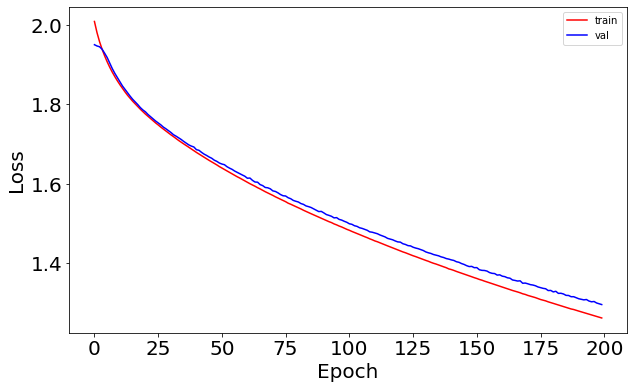

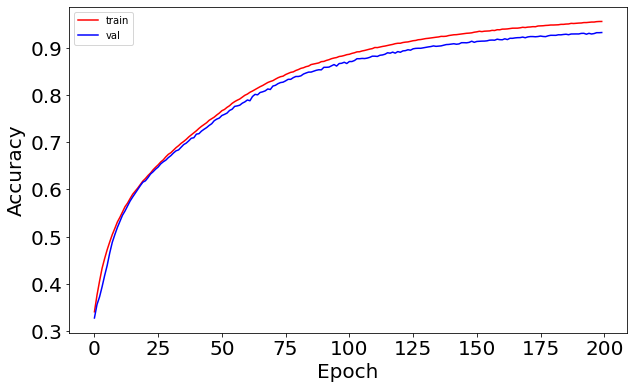

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history_bn_adam.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history_bn_adam.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history_bn_adam.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(history_bn_adam.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
evaluation_val_bt_ad = model_bn.evaluate(X_test, y_test)
print('Validation accuracy: ', evaluation_val_bt_ad[1])

18000/18000 [==============================] - 2s 84us/step
Validation accuracy:  0.7594444155693054


##### Inference on the above outputs:
1. It can be found that in the above output the accuracy of the model on training data is ~91% and on validation data is ~87%.
2. Also the first plot shows that as the number of epochs increses, loss gradually decreasses for both the data. But the Loss on validation data is high compared to the loss on the training data.
3. In the second plot as the number of epochs increses, accuracy gradually decreasses for both the data. But the accuracy on validation data is high compared to the loss on the training data.
4. The performance of the model on testing data is just ~76%.\


    Below, a try was made on the model by doing many hyperparameters tuning using GridsearchCV.

### Step 12: Many Hyperparameters tuning:

In [ ]:
def model_h(init_mode):
    model_bn = Sequential()

    model_bn.add(Dense(1024, input_shape = (1024, ), kernel_initializer=init_mode, name ='Layer_1'))
    model_bn.add(BatchNormalization(center=True, scale=True))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(512, kernel_initializer=init_mode, name ='Layer_2'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(128, kernel_initializer=init_mode, name ='Layer_3'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(64, kernel_initializer=init_mode, name ='Layer_4'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(32, kernel_initializer=init_mode, name ='Layer_5'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(32, kernel_initializer=init_mode, name ='Layer_6'))
    model_bn.add(BatchNormalization(center=True, scale=True ))
    model_bn.add(Activation('relu'))

    model_bn.add(Dense(10, kernel_initializer=init_mode, name ='Output_Layer', kernel_regularizer = l2(1e-1)))
    model_bn.add(Activation('softmax'))

    model_bn.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model_bn

In [ ]:
model_init_batch_epoch_CV = KerasClassifier(build_fn=model_h, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['he_normal', 'he_uniform'] 
batches = [1000, 2000]
epochs = [100, 200]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init_mode=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 109/200
28000/28000 [==============================] - 0s 13us/step - loss: 0.1333 - accuracy: 0.9902
Epoch 110/200
28000/28000 [==============================] - 0s 15us/step - loss: 0.1210 - accuracy: 0.9933
Epoch 111/200
28000/28000 [==============================] - 0s 14us/step - loss: 0.1191 - accuracy: 0.9935
Epoch 112/200
28000/28000 [==============================] - 0s 12us/step - loss: 0.1286 - accuracy: 0.9899
Epoch 113/200
28000/28000 [==============================] - 0s 12us/step - loss: 0.1155 - accuracy: 0.9935
Epoch 114/200
28000/28000 [==============================] - 0s 12us/step - loss: 0.1212 - accuracy: 0.9916
Epoch 115/200
28000/28000 [==============================] - 0s 14us/step - loss: 0.1205 - accuracy: 0.9918
Epoch 116/200
28000/28000 [==============================] - 0s 12us/step - loss: 0.1146 - accuracy: 0.9932
Epoch 117/200
28000/28000 [==============================] - 0s 13us/step - loss: 0.1

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.7829 using {'batch_size': 2000, 'epochs': 200, 'init_mode': 'he_uniform'}


##### Inference on the above outputs:
1. By doing many Hyperparameter tuning the accuracy of the model on training is 78.29%.
2. To have conclusion on the performance on the model evaluation of the model on the validation was carried out in the colab but it fetched a lot of time so it was not possible to recieve a conclusion on the model after hyperparameter tuning.

===============================================================================================================

### Conclusion:
1. Initially the given dataset was read.
2. The read dataset was Reshaped, One-Hot encoded and Normalized.
3. Various number of models and trials were done to achieve good results
4. Few models were improved by hperparameter tuning.
5. As per the above approach the model shown in the Step 11 can be used in the production. 
6. The ways the above approcah could have been improved which might have given us a different scenarios:

        1. Few trials with exponential learning rate could have been tried.
        2. By increasing or decriasing the number of layers in the model, but with careful handling on deeper networks because we hae the problem of vanishing gradients in the deeper networks.
        3. By building the models with bias.
        4. It was found that building models with Batch Normalization and Dropout did not work well so few models could have been built with dropout layers alone.
        5. By performing more trials in the Model - 3 some more various activations in the intermediate layers.
        6. By using different weight initialization methods.
        7. By using different optimizers.
7. There are many opportunities available to still achieve good resuts.